In [247]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics
import matplotlib.pyplot as plt
import os

In [248]:
title_approaches = {
    'naive':'Naive',
    'fsn':'Fair Score',
    'bcm':'FairCal (Ours)',
    'oracle':'Oracle (Ours)'}
title_calibration_methods = {
    'binning': 'Binning',
    'splines': 'Splines',
    'isotonic_regression': 'Isotonic Regression',
    'beta': 'Beta Calibration'
}
title_features = {
    'facenet':'FaceNet (VGGFace2)',
    'facenet-webface':'FaceNet (Webface)',
    'arcface': 'ArcFace'}
title_metrics = {
    'mean': 'Mean',
    'aad': 'AAD',
    'mad': 'MAD',
    'std': 'STD'}
caption_metrics = {
     'mean': 'Mean',
     'aad': 'AAD (Average Absolute Deviation)',
     'mad': 'MAD (Maximum Absolute Deviation)',
     'std': 'STD (Standard Deviation)',
}
title_keys = {
    'baseline': 'Baseline',
    'agenda': 'AGENDA',
    'ftc': 'FTC',
    'fct2': 'FCT',
    'fsn': 'FSN',
    'bmc': 'FairCal (Ours)',
    'bmc_imp': 'BMC Improved (Ours)',
    'bmc_error': 'BMC Error (Ours)',
    'bmc_min': 'BMC Min (Ours)',
    'bmc_proj': 'BMC Proj (Ours)',
    'oracle': 'Oracle (Ours)'}
header_titles = {
    'African': 'Af',
    'Asian': 'As',
    'Caucasian': 'Ca',
    'Indian': 'In',
    'asian_females': 'AsF',
    'asian_males': 'AsM',
    'black_females': 'AfF',
    'black_males': 'AfM',
    'indian_females': 'IF',
    'indian_males': 'IM',
    'white_females': 'CF',
    'white_males': 'CM',
    'Global': 'Gl',
    'B': 'Af',
    'A': 'As',
    'W': 'C',
    'I': 'I',
    'F': 'F',
    'M': 'M'
}
title_datasets = {
    'rfw': 'RFW',
    'bfw': 'BFW',
    'bfw_eq': 'BFW (equal)'
}
caption_calibration_methods = {
    'binning': 'histogram binning',
    'splines': 'spline calibration',
    'isotonic_regression': 'isotonic regression',
    'beta': 'beta calibration'
}
caption_measures = {
    'ece': 'ECE',
    'ks': 'KS',
    'brier': 'Brier Score'
}
features_datasets = {
    'rfw': ['facenet', 'facenet-webface'],
    'bfw': ['facenet-webface', 'arcface'],
    'bfw_eq': ['facenet-webface', 'arcface']
}
attributes_datasets = {
    'rfw': 'ethnicity',
    'bfw': 'att',
    'bfw_eq': 'att'
}

In [249]:
legend_fontsize = 16
title_fontsize = 20
label_fontsize = 18
ticks_fontsize = 16

In [250]:
features = ['facenet', 'facenet-webface', 'arcface']
keys = ['baseline', 'agenda', 'ftc', 'fsn','bmc', 'oracle'] # also have results for bmc_imp and bmc_error
datasets = ['rfw', 'bfw']
measures = ['ece', 'ks', 'brier']
metrics = ['mean', 'aad', 'mad', 'std']
folds = [1,2,3,4,5]
nbins = {'rfw':10, 'bfw':25}
calibration_methods = ['beta']

In [251]:
# define the name of the directory to be created
path = "../tables_iclr"
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)
for folder_name in ['fair_calibration', 'subgroup_calibration', 'predictive_equality_at_fpr', 'equal_opportunity_at_fnr', 'global_performance']:
    path = "../tables_iclr/"+folder_name
    try:
        os.mkdir(path)
    except OSError:
        print ("Creation of the directory %s failed" % path)
    else:
        print ("Successfully created the directory %s " % path)

Creation of the directory ../tables_iclr failed
Creation of the directory ../tables_iclr/fair_calibration failed
Creation of the directory ../tables_iclr/subgroup_calibration failed
Creation of the directory ../tables_iclr/predictive_equality_at_fpr failed
Creation of the directory ../tables_iclr/equal_opportunity_at_fnr failed
Creation of the directory ../tables_iclr/global_performance failed


In [252]:
# define the name of the directory to be created
path = "../figs_iclr"
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)
for folder_name in ['fair_calibration', 'robustness']:
    path = "../figs_iclr/"+folder_name
    try:
        os.mkdir(path)
    except OSError:
        print ("Creation of the directory %s failed" % path)
    else:
        print ("Successfully created the directory %s " % path)

Creation of the directory ../figs_iclr failed
Creation of the directory ../figs_iclr/fair_calibration failed
Creation of the directory ../figs_iclr/robustness failed


# Load Measures

In [253]:
def load_measures(dataset,feature,approach,subgroups,att,measure,calibration_method,nbins,n_clusters):
    if 'bmc' in approach:        
        temp = np.load(f"../experiments_new/{dataset}/{feature}/{approach}/{calibration_method}/nbins_{nbins}_nclusters_{n_clusters}.npy",allow_pickle=True).item()
    elif approach == 'fsn':
        temp = np.load(f"../experiments_new/{dataset}/{feature}/{approach}/{calibration_method}/nbins_{nbins}_nclusters_{n_clusters}_fpr_1e-03.npy",allow_pickle=True).item()
    elif approach == 'baseline':
        temp = np.load(f"../experiments_new/{dataset}/{feature}/{approach}/{calibration_method}/nbins_{nbins}.npy",allow_pickle=True).item()
    elif approach == 'oracle':
        temp = np.load(f"../experiments_new/{dataset}/{feature}/{approach}/{calibration_method}/nbins_{nbins}.npy",allow_pickle=True).item()
    elif approach == 'ftc':
        temp = np.load(f"../experiments_new/{dataset}/{feature}/{approach}/{calibration_method}/nbins_{nbins}.npy",allow_pickle=True).item()
    elif approach == 'agenda':
        temp = np.load(f"../experiments_new/{dataset}/{feature}/{approach}/{calibration_method}/nbins_{nbins}.npy",allow_pickle=True).item()    
    else:
        print('hello')
        temp = np.load(f"../experiments_new/{dataset}_{feature}_{approach}_{calibration_method}_nbins_{nbins}.npy",allow_pickle=True).item()
    data = np.zeros((5,len(subgroups[att])))
    for fold in range(1,6):
        for j, subgroup in enumerate(subgroups[att]):
            data[fold-1,j] = temp['fold'+str(fold)][measure][att][subgroup]
    return data

In [254]:
def get_sensitive_attributes_subgroups(dataset):
    if dataset == 'rfw':
        sensitive_attributes = ['ethnicity']
        subgroups = {'ethnicity':['African', 'Asian', 'Caucasian', 'Indian']}
    elif 'bfw' in dataset:
        sensitive_attributes = ['e', 'g', 'att']
        subgroups = {
            'e':['B', 'A', 'W', 'I'],
            'g':['F','M'],
            'att': ['black_females', 'black_males', 'asian_females', 'asian_males', 'white_females', 'white_males', 'indian_females', 'indian_males']
        }
    return sensitive_attributes, subgroups

In [230]:
ks = np.array([5,10,15,20,25,50,75,100])
folds = [1,2,3,4,5]
datasets = ['rfw', 'bfw']
mean = {}
aad = {}
mad = {}
std = {}
for measure in measures:
    mean[measure] = {}
    aad[measure] = {}
    mad[measure] = {}
    std[measure] = {}
    for calibration in calibration_methods:
        mean[measure][calibration] = {}
        aad[measure][calibration] = {}
        mad[measure][calibration] = {}
        std[measure][calibration] = {}
        for dataset in datasets:
            mean[measure][calibration][dataset] = {}
            aad[measure][calibration][dataset] = {}
            mad[measure][calibration][dataset] = {}
            std[measure][calibration][dataset] = {}
            sensitive_attributes, subgroups = get_sensitive_attributes_subgroups(dataset)
            for feature in features:
                mean[measure][calibration][dataset][feature] = {}
                aad[measure][calibration][dataset][feature] = {}
                mad[measure][calibration][dataset][feature] = {}
                std[measure][calibration][dataset][feature] = {}
                for att in sensitive_attributes:
                    mean[measure][calibration][dataset][feature][att] = {}
                    aad[measure][calibration][dataset][feature][att] = {}
                    mad[measure][calibration][dataset][feature][att] = {}
                    std[measure][calibration][dataset][feature][att] = {}
                    for key in keys:
                        mean[measure][calibration][dataset][feature][att][key] = np.zeros((len(folds),len(ks)))
                        aad[measure][calibration][dataset][feature][att][key] = np.zeros((len(folds),len(ks)))
                        mad[measure][calibration][dataset][feature][att][key] = np.zeros((len(folds),len(ks)))
                        std[measure][calibration][dataset][feature][att][key] = np.zeros((len(folds),len(ks)))
                        data_work = np.zeros((len(folds),len(subgroups[att])))
                        for i_k, k in enumerate(ks):
                            data_work = load_measures(dataset,feature,key,subgroups,att,measure,calibration,nbins[dataset],k)
                            if key != 'brier':
                                data_work *= 100
                            mean_aux = data_work.mean(axis=1).reshape(-1,1)
                            mean[measure][calibration][dataset][feature][att][key][:,i_k] = data_work.mean(axis=1)
                            aad[measure][calibration][dataset][feature][att][key][:,i_k] = np.abs(data_work-mean_aux).mean(axis=1)
                            mad[measure][calibration][dataset][feature][att][key][:,i_k] = np.abs(data_work-mean_aux).max(axis=1)
                            std[measure][calibration][dataset][feature][att][key][:,i_k] = np.std(data_work,axis=1)
data = {'mean':mean, 'aad':aad, 'mad': mad, 'std': std}

# Creating Figures - Fair-Calibration

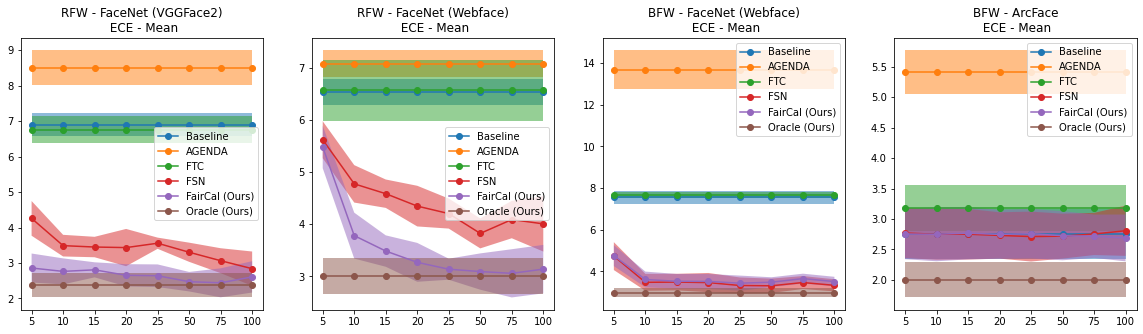

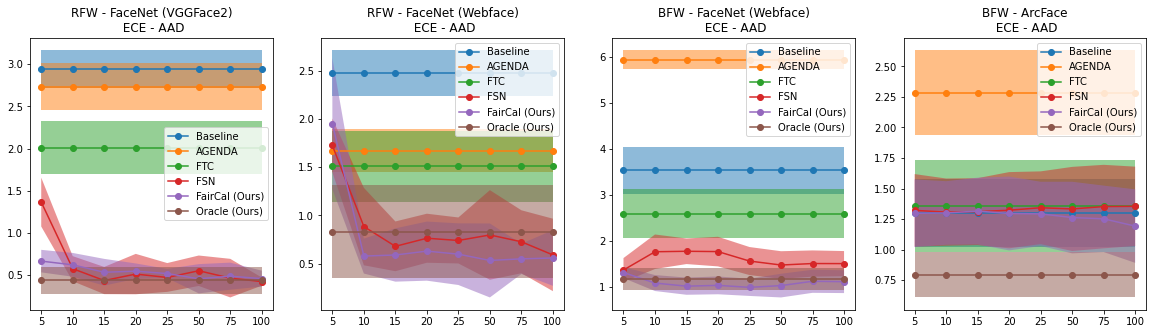

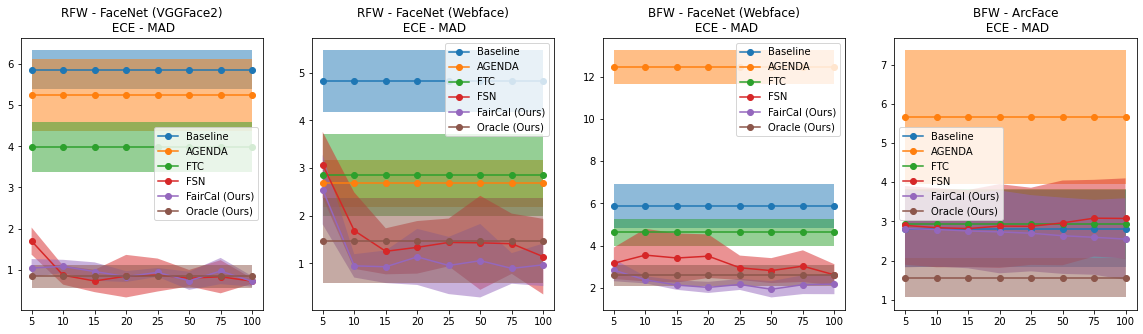

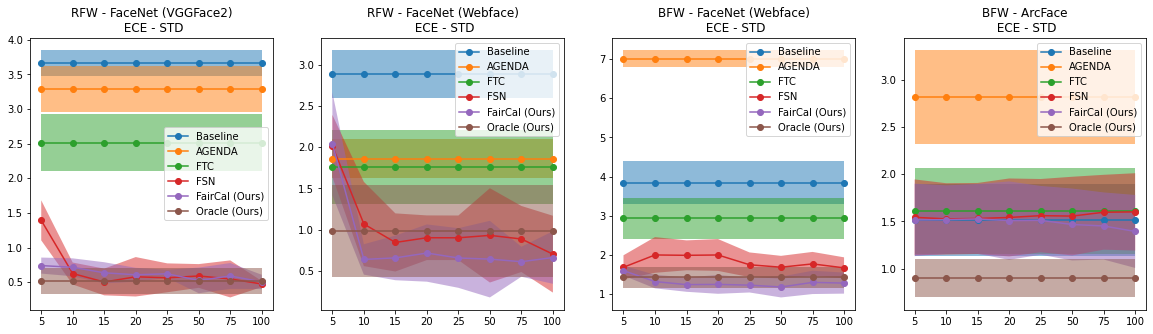

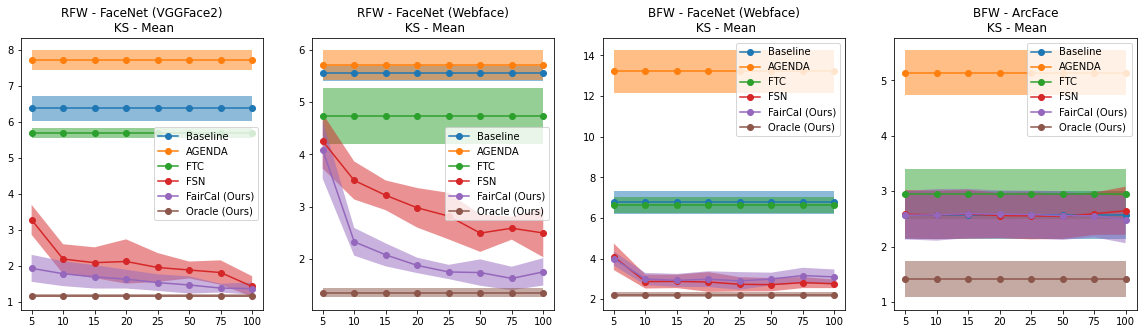

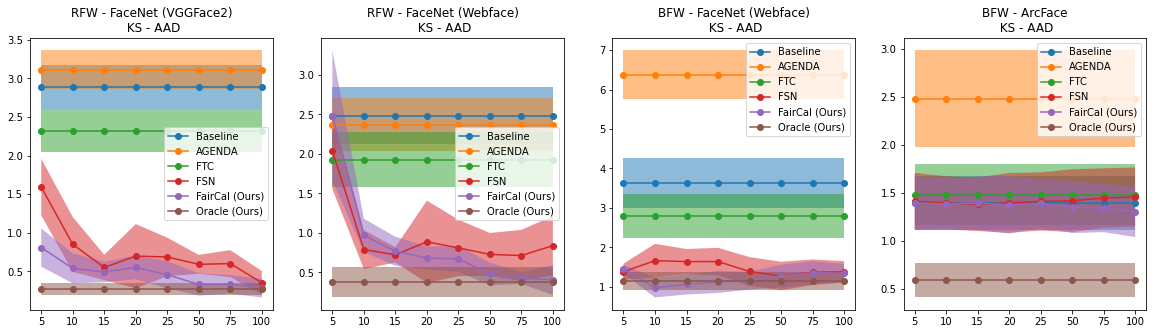

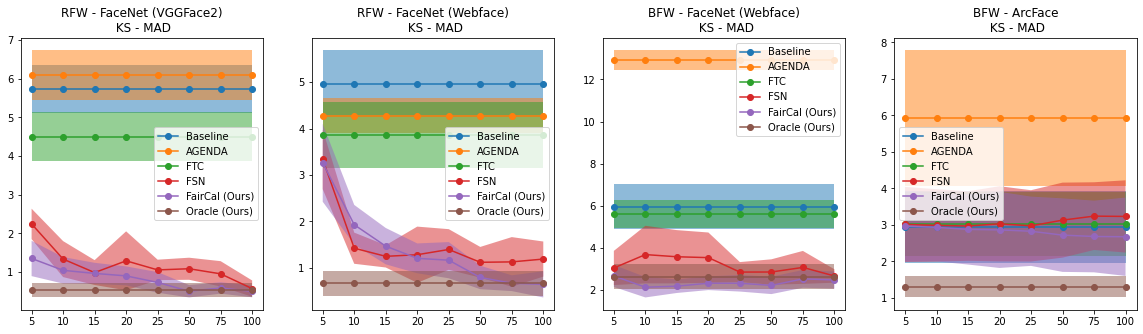

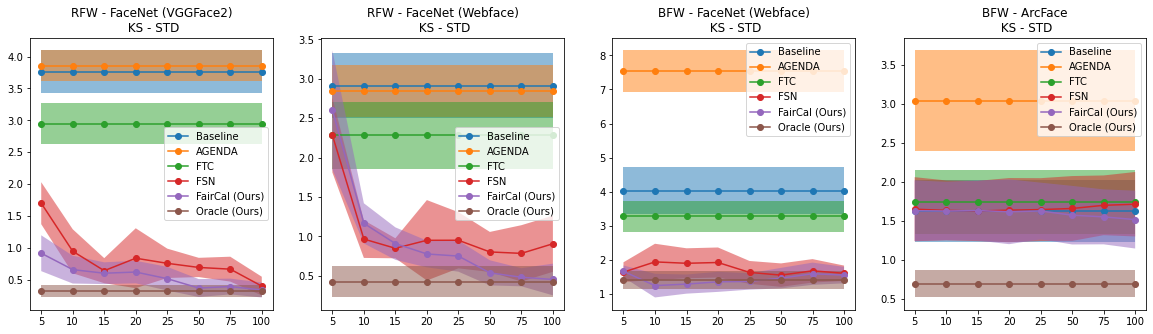

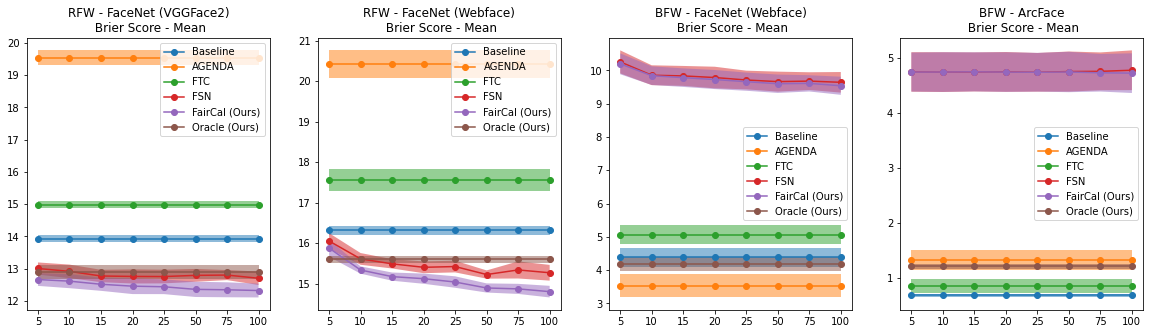

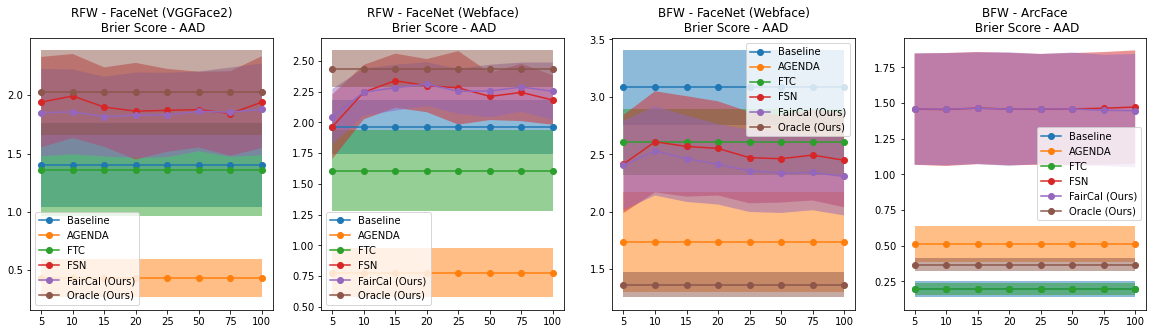

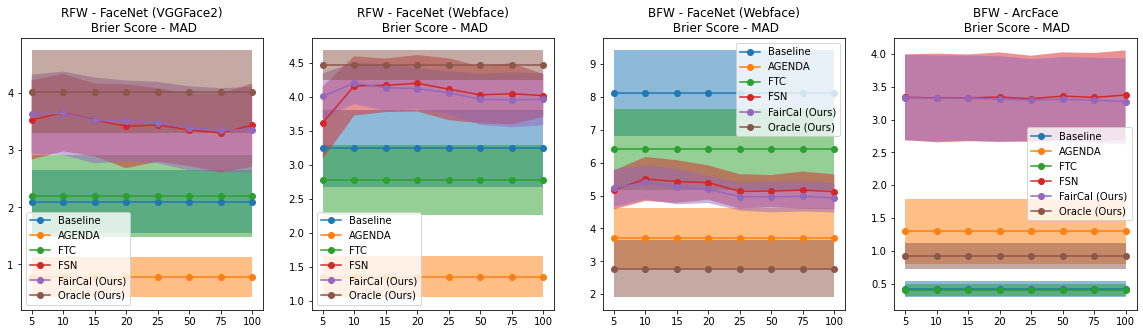

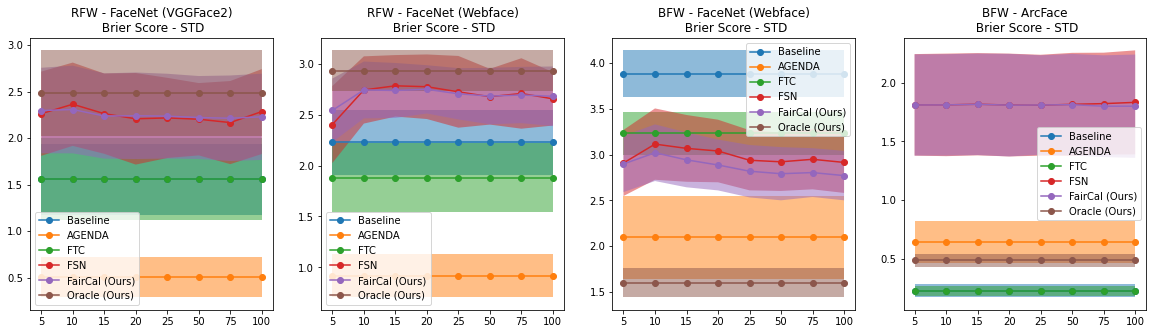

In [231]:
for measure in measures:
    for calibration in calibration_methods:
        for metric in metrics:
            total_graphs = 0
            for dataset in datasets:
                total_graphs += len(features_datasets[dataset])
            fig, ax = plt.subplots(1,total_graphs, figsize=(total_graphs*5,5))
            
            ix = 0
            for dataset in datasets:
                sensitive_attributes, subgroups = get_sensitive_attributes_subgroups(dataset)
                att = attributes_datasets[dataset]
                for feature in features_datasets[dataset]:
                    legend = []
                    for key in keys:
                        y = data[metric][measure][calibration][dataset][feature][att][key].mean(axis=0)
                        y_std = data[metric][measure][calibration][dataset][feature][att][key].std(axis=0)
                        ax[ix].plot(np.arange(len(ks)),y,marker='o')
                        ax[ix].fill_between(np.arange(len(ks)),y-y_std,y+y_std,alpha = 0.5)
                        legend.append(title_keys[key])
                    ax[ix].legend(legend)
                    ax[ix].xaxis.set_ticks(np.arange(len(ks)))
                    ax[ix].xaxis.set_ticklabels(ks)
                    ax[ix].set_title(f"{title_datasets[dataset]} - {title_features[feature]}\n {caption_measures[measure]} - {title_metrics[metric]}")
                    ix += 1

            
        save_as = f"{calibration}_{dataset}_{att}_{measure}_{metric}.pdf"
#         plt.savefig('../figs_neurips/fair_calibration/'+save_as, bbox_inches='tight')
#         plt.close()

# Creating Tables - Fair-Calibration

## Bias Measures

In [255]:
def create_table_bias_measures(calibration, nbins, measure):
    header_features = [title_features[feature] for feature in features]
    k = 100
    i_k = -1
    
    # Setup Row Headers
    row_headers = []
    for key in keys:
        row_headers.append(title_keys[key])

    # Setup Column Headers
    col_index_lvl_1 = []
    col_index_lvl_2 = []
    col_index_lvl_3 = []
    for dataset in datasets:
        for feature in features_datasets[dataset]:
            for metric in metrics:
                col_index_lvl_1.append(title_datasets[dataset])
                col_index_lvl_2.append(title_features[feature])
                col_index_lvl_3.append(title_metrics[metric])

    col_headers = [col_index_lvl_1,col_index_lvl_2,col_index_lvl_3]
    col_headers = pd.MultiIndex.from_tuples(list(zip(*col_headers)))

    table = np.zeros((len(row_headers),len(col_headers)))
    for i1, dataset in enumerate(datasets):
        att = attributes_datasets[dataset]
        for i2, feature in enumerate(features_datasets[dataset]):
            for i3, metric in enumerate(metrics):
                for row_i, key in enumerate(keys):
                    data_work = data[metric][measure][calibration][dataset][feature][att][key][:,i_k].mean()
                    column_j = len(features_datasets[dataset])*len(metrics)*i1+len(metrics)*i2
                    table[row_i,column_j+i3] = data_work
    db_temp = pd.DataFrame(
            table,
            index=row_headers,
            columns=col_headers)
    
    txt = db_temp.to_latex(float_format="%.2f",multicolumn_format='c', column_format='c')
    # Bold entries
    txt = txt.split('\n')
    bold_idx = table[:(len(keys)-1),:].argmin(axis=0)
    for i, idx in enumerate(bold_idx):
        temp = txt[6+idx].split(' & ')
        if '\\\\' in temp[i+1]:
            temp[i+1] = '\\textbf{'+str(float(temp[i+1][:-2]))+'}\\\\'
        else:
            temp[i+1] = '\\textbf{'+str(float(temp[i+1]))+'}'

        txt[6+idx] = ' & '.join(temp)
    txt = '\n'.join(txt)
    txt = txt.replace('{}','',2)
    txt = txt.replace('{}','\hfill $(\downarrow)$')
    txt = txt.replace('{tabular}{c}','{tabular}{l|cccc|cccc|cccc|cccc}')
    txt = txt.replace('multicolumn{8}{c}','multicolumn{8}{c|}',1)
    txt = txt.replace('multicolumn{4}{c}','multicolumn{4}{c|}',2)
    txt = txt.replace('multicolumn{4}{c|}','multicolumn{4}{c}',1)
    txt = txt.replace('AGENDA','AGENDA \citep{Dhar2020AGENDA}')
    txt = txt.replace('FTC','FTC \citep{Terhorst2020Comparison}')
    txt = txt.replace('FSN','FSN \citep{terhorst2020scorenormalization}')
    txt = txt.replace('\\toprule\n','')
    txt = txt.replace('\\bottomrule\n','')
    txt = txt.replace('\nOracle','[2pt]\nOracle')
    # Italic entries for Oracle method
    txt = txt.split('\n')
    for i in range(table.shape[1]):
        temp = txt[4+len(keys)].split(' & ')
        if '\\\\' in temp[i]:
            temp[i] = '\\textit{'+str(float(temp[i][:-2]))+'}\\\\'
        elif i == 0:
            temp[i] = '\\textit{'+temp[i]+'}'
        else:
            temp[i] = '\\textit{'+str(float(temp[i]))+'}'
        txt[4+len(keys)] = ' & '.join(temp)
    txt = '\n'.join(txt)
    txt = txt.replace('end{tabular}','end{tabular}}\n\\end{table}')
    label = f"table:fair_calibration_{measure}"
    
    caption = "\\textbf{Fairness calibration:} measured by the mean "+caption_measures[measure]+"across the sensitive subgroups. \textbf{Bias:} measured by the deviations of "+caption_measures[measure]+" across subgroups in terms of three deviation measures: Average Absolute Deviation (AAD), Maximum Absolute Deviation (MAD), and Standard Deviation (STD) (lower is better)."
    txt = "\\begin{table}\n\\caption{"+caption+"}\n\\label{"+label+"}\n\\resizebox{\\textwidth}{!}{\n"+txt
    with open(f"../tables_iclr/fair_calibration/{calibration}_nbins{nbins[dataset]}_{measure}.tex",'w') as file:
        file.write(txt)

In [256]:
for calibration in calibration_methods:
    for measure in measures:
        create_table_bias_measures(calibration, nbins, measure)

In [234]:
def create_table_bias_measures_std(calibration, nbins, measure):
    header_features = [title_features[feature] for feature in features]
    k = 100
    i_k = -1
    
    # Setup Row Headers
    row_headers = []
    for key in keys:
        row_headers.append(title_keys[key])

    # Setup Column Headers
    col_index_lvl_1 = []
    col_index_lvl_2 = []
    col_index_lvl_3 = []
    for dataset in datasets:
        for feature in features_datasets[dataset]:
            for metric in metrics:
                col_index_lvl_1.append(title_datasets[dataset])
                col_index_lvl_2.append(title_features[feature])
                col_index_lvl_3.append(title_metrics[metric])

    col_headers = [col_index_lvl_1,col_index_lvl_2,col_index_lvl_3]
    col_headers = pd.MultiIndex.from_tuples(list(zip(*col_headers)))

    table = np.zeros((len(row_headers),len(col_headers)))
    table_std = np.zeros((len(row_headers),len(col_headers)))
    for i1, dataset in enumerate(datasets):
        att = attributes_datasets[dataset]
        for i2, feature in enumerate(features_datasets[dataset]):
            for i3, metric in enumerate(metrics):
                for row_i, key in enumerate(keys):
                    data_work = data[metric][measure][calibration][dataset][feature][att][key][:,i_k].mean()
                    data_work_std = data[metric][measure][calibration][dataset][feature][att][key][:,i_k].std()
                    column_j = len(features_datasets[dataset])*len(metrics)*i1+len(metrics)*i2
                    table[row_i,column_j+i3] = data_work
                    table_std[row_i,column_j+i3] = data_work_std

    # Setup Column Headers
    col_index_lvl_1 = []
    col_index_lvl_2 = []
    for dataset in datasets:
        for feature in features_datasets[dataset]:
            col_index_lvl_1.append(title_datasets[dataset])
            col_index_lvl_2.append(title_features[feature])

    col_headers = [col_index_lvl_1,col_index_lvl_2]
    col_headers = pd.MultiIndex.from_tuples(list(zip(*col_headers)))

    for i_metric, metric in enumerate(metrics):
        aux1 = np.apply_along_axis(lambda y: ['%1.2f' % i for i in y], 0, table[:,i_metric::len(metrics)])
        aux2 = np.apply_along_axis(lambda y: ['@ %1.2f' % i for i in y], 0, table_std[:,i_metric::len(metrics)])
        table_new = np.core.defchararray.add(aux1, aux2)
        db_temp = pd.DataFrame(
                table_new,
                index=row_headers,
                columns=col_headers)            
        txt = db_temp.to_latex(float_format="%.2f",multicolumn_format='c', column_format='c')
        txt = txt.replace('@','$\pm$')
        # Bold entries
        txt = txt.split('\n')
        bold_idx = table[:,i_metric::len(metrics)][:(len(keys)-1),:].argmin(axis=0)
        for i, idx in enumerate(bold_idx):
            temp = txt[5+idx].split(' & ')
            if '\\\\' in temp[i+1]:
                temp[i+1] = '\\textbf{'+temp[i+1][:-2]+'}\\\\'
            else:
                temp[i+1] = '\\textbf{'+temp[i+1]+'}'

            txt[5+idx] = ' & '.join(temp)
        txt = '\n'.join(txt)
        txt = txt.replace('{tabular}{c}','{tabular}{l|cc|cc}')
        txt = txt.replace('multicolumn{2}{c}','multicolumn{2}{c|}',1)
        txt = txt.replace('AGENDA','AGENDA \citep{Dhar2020AGENDA}')
        txt = txt.replace('FTC','FTC \citep{Terhorst2020Comparison}')
        txt = txt.replace('FSN','FSN \citep{terhorst2020scorenormalization}')
        txt = txt.replace('\\toprule\n','')
        txt = txt.replace('\\bottomrule\n','')
        txt = txt.replace('\nOracle','[2pt]\nOracle')
        # Italic entries for Oracle method
        txt = txt.split('\n')
        for i in range(table_new.shape[1]):
            temp = txt[3+len(keys)].split(' & ')
            if '\\\\' in temp[i]:
                temp[i] = '\\textit{'+temp[i][:-2]+'}\\\\'
            elif i == 0:
                temp[i] = '\\textit{'+temp[i]+'}'
            else:
                temp[i] = '\\textit{'+temp[i]+'}'
            txt[3+len(keys)] = ' & '.join(temp)
        txt = '\n'.join(txt)
        txt = txt.replace('end{tabular}','end{tabular}}\n\\end{table}')
        label = f"table:fair_calibration_{measure}_{metric}"
        if metric == 'mean':
            caption = "Fairness Calibration as measured by "+caption_metrics[metric]+" across sensitive subgroups."
        else:
            caption = "Bias in fairness-calibration as measured by the deviations of "+caption_measures[measure]+" across subgroups in terms of "+caption_metrics[metric]+'.'
        txt = "\\begin{table}\n\\caption{"+caption+"}\n\\label{"+label+"}\n\\centering\\resizebox{\\textwidth}{!}{\n"+txt  
        with open(f"../tables_iclr/fair_calibration/{calibration}_nbins{nbins[dataset]}_{measure}_{metric}.tex",'w') as file:
            file.write(txt)

In [235]:
for calibration in calibration_methods:
    for measure in ['ks']:#measures:
        create_table_bias_measures_std(calibration, nbins, measure)

## Calibration per subgroup

In [236]:
def create_table_calibration_subgroup(calibration, nbins, dataset, measure):
    header_features = [title_features[feature] for feature in features]
    k = 100 
    sensitive_attributes, subgroups = get_sensitive_attributes_subgroups(dataset)
    for att in sensitive_attributes:
        headers = []
        subgroups[att].insert(0,'Global')
        for subgroup in subgroups[att]:
            if dataset == 'rfw':
                headers.append(subgroup)
            else:
                headers.append(header_titles[subgroup])
        index_lvl_1 = []
        index_lvl_2 = []
        for i, feature in enumerate(features_datasets[dataset]):
            for j, subgroup in enumerate(subgroups[att]):
                index_lvl_1.append(title_features[feature])
                index_lvl_2.append(header_titles[subgroup])
        table = np.zeros((len(keys),len(features_datasets[dataset])*len(subgroups[att])))
        for i, feature in enumerate(features_datasets[dataset]):
            for j, key in enumerate(keys):
                data_work = load_measures(dataset,feature,key,subgroups,att,measure,calibration,nbins[dataset],k)
                if measure != 'brier':
                    data_work *=100
                table[j,len(subgroups[att])*i:len(subgroups[att])*i+len(headers)] = data_work.mean(axis=0)

        arrays = [index_lvl_1,index_lvl_2]
        tuples = list(zip(*arrays))
        db_temp = pd.DataFrame(
                table,
                index=[title_keys[key] for key in keys],
                columns = pd.MultiIndex.from_tuples(tuples))
        txt = db_temp.to_latex(float_format="%.2f",multicolumn_format='c', column_format='c')
        txt = txt.replace('{}','',1)
        txt = txt.replace('{}','\hfill $(\downarrow)$')
        txt = txt.replace('{tabular}{c}','{tabular}{l'+('|'+('c@{\hskip 4pt}'*len(subgroups[att])))*len(features_datasets[dataset])+'}')
        txt = txt.replace('AGENDA','AGENDA \citep{Dhar2020AGENDA}')
        txt = txt.replace('FTC','FTC \citep{Terhorst2020Comparison}')
        txt = txt.replace('FSN','FSN \citep{terhorst2020scorenormalization}')
        txt = txt.replace('\\toprule\n','')
        txt = txt.replace('\\bottomrule\n','')
#         i_min = 0
#         i_max = 4
#         start = 4
#         txt = txt.split('\n')
#         bold_idx = table[i_min:i_max,:].argmin(axis=0)
#         for i, idx in enumerate(bold_idx):
#             temp = txt[start+idx].split(' & ')
#             if '\\\\' in temp[i+1]:
#                 temp[i+1] = '\\textbf{'+str(float(temp[i+1][:-2]))+'}\\\\'
#             else:
#                 temp[i+1] = '\\textbf{'+str(float(temp[i+1]))+'}'
#             txt[start+idx] = ' & '.join(temp)
#         txt = '\n'.join(txt)
        if dataset == 'rfw':
            txt = txt.replace('multicolumn{5}{c}','multicolumn{5}{c|}',1)
        else:
            if att == 'att':
                txt = txt.replace('multicolumn{9}{c}','multicolumn{9}{c|}',1)
            elif att == 'e':
                txt = txt.replace('multicolumn{5}{c}','multicolumn{5}{c|}',1)
            elif att == 'g':
                txt = txt.replace('multicolumn{3}{c}','multicolumn{3}{c|}',1)
        txt = txt.replace('\nOracle','[2pt]\nOracle')
        # Italic entries for Oracle method
        txt = txt.split('\n')
        for i in range(table.shape[1]):
            temp = txt[3+len(keys)].split(' & ')
            if '\\\\' in temp[i]:
                temp[i] = '\\textit{'+str(float(temp[i][:-2]))+'}\\\\'
            elif i == 0:
                temp[i] = '\\textit{'+temp[i]+'}'
            else:
                temp[i] = '\\textit{'+str(float(temp[i]))+'}'
            txt[3+len(keys)] = ' & '.join(temp)
        txt = '\n'.join(txt)
        label = f"table:subgroup_calibration_{dataset}_{measure}_{att}"
        if dataset == 'rfw':
            caption = f'{caption_measures[measure]} on all the pairs (Global (Gl)) and on each ethnicity subgroup (African (Af), Asian (As), Caucasian (Ca), Indian (In) using {caption_calibration_methods[calibration]} on the RFW dataset.'
            txt = txt.replace('end{tabular}','end{tabular}\n\\end{table}')
            txt = "\\begin{table}\n\\caption{"+caption+"}\n\\label{"+label+"}\n\centering\n"+txt
        elif 'bfw' in dataset:
            txt = txt.replace('end{tabular}','end{tabular}}\n\\end{table}')
            if att == 'att':
                caption = f'{caption_measures[measure]} on all the pairs (Global (Gl)) and on each ethnicity and gender subgroup (African Females (AfF), African Males (AfM), Asian Females (AsF), Asian Males (AsM), Caucasian Females (CF), Caucasian Males (CM), Indian Females (IF), Indian Males (IM)) using {caption_calibration_methods[calibration]} on the BFW dataset.'
            elif att == 'e':
                caption = f'{caption_measures[measure]} on all the pairs (Global (Gl)) and on each ethnicity subgroup (African (Af), Asian (As), Caucasian (Ca), Indian (In)) using {caption_calibration_methods[calibration]} on the BFW dataset.'
            elif att == 'g':
                caption = f'{caption_measures[measure]} on all the pairs (Global (Gl)) and on each gender subgroup (Females (F), Males (M)) using {caption_calibration_methods[calibration]} on the BFW dataset.'
            txt = "\\begin{table}\n\\caption{"+caption+"}\n\\label{"+label+"}\n\centering\n\\resizebox{\\textwidth}{!}{\n"+txt
        with open(f"../tables_iclr/subgroup_calibration/{calibration}_{dataset}_{measure}_{att}.tex",'w') as file:
            file.write(txt)

In [237]:
for calibration in calibration_methods:
    for dataset_name in ['rfw', 'bfw']:
        for measure in measures:
            create_table_calibration_subgroup(calibration, nbins, dataset_name, measure)

# Global Performance

In [238]:
def get_overall_stats(calibration_method, nbins, dataset,feature,approach,att,n_clusters,fpr_def):
    if 'bmc' in approach:
        temp = np.load('../experiments_new/'+dataset+'/'+feature+'/'+approach+'/'+calibration_method+'/nbins_'+str(nbins)+'_nclusters_'+str(n_clusters)+'.npy',allow_pickle=True).item()
        key = 'calibration'
    elif approach == 'fsn':
        temp = np.load('../experiments_new/'+dataset+'/'+feature+'/'+approach+'/'+calibration_method+'/nbins_'+str(nbins)+'_nclusters_'+str(n_clusters)+'_fpr_1e-03.npy',allow_pickle=True).item()
        key = 'pre_calibration'
    else:
        temp = np.load('../experiments_new/'+dataset+'/'+feature+'/'+approach+'/'+calibration_method+'/nbins_'+str(nbins)+'.npy',allow_pickle=True).item()
        if approach == 'oracle':
            key = 'calibration'
        else:
            key = 'pre_calibration'
    data = np.zeros((5,1+len(fpr_def)))
    for fold in range(1,6):
        fpr = temp['fold'+str(fold)]['fpr'][att]['Global'][key]
        tpr = temp['fold'+str(fold)]['tpr'][att]['Global'][key]
        data[fold-1,0] = sklearn.metrics.auc(fpr,tpr)
        data[fold-1,1:] = np.interp(fpr_def, fpr, tpr)
    return data

In [239]:
keys = ['baseline', 'agenda', 'ftc', 'fsn', 'bmc', 'oracle']

In [240]:
error = [1e-3,1e-2]#,0.5e-1]
title_stat = ['AUROC', '0.1\% FPR', '1\% FPR']#, '5\% FPR']
n_clusters = 100
for calibration in calibration_methods:
    row_headers = []
    for key in keys:
        row_headers.append(title_keys[key])

    # Setup Column Headers
    col_index_lvl_1 = []
    col_index_lvl_2 = []
    col_index_lvl_3 = []
    for dataset in datasets:
        for feature in features_datasets[dataset]:
            for i,_ in enumerate(title_stat):
                col_index_lvl_1.append(title_datasets[dataset])
                col_index_lvl_2.append(title_features[feature])
                col_index_lvl_3.append('?'+str(i))

    col_headers = [col_index_lvl_1,col_index_lvl_2,col_index_lvl_3]
    col_headers = pd.MultiIndex.from_tuples(list(zip(*col_headers)))

    table = np.zeros((len(row_headers),len(col_headers)))

    for i1, dataset in enumerate(datasets):
        if dataset == 'rfw':
            att = 'ethnicity'
        elif 'bfw' in dataset:
            att = 'att'
        for i2, feature in enumerate(features_datasets[dataset]):
            for row_i, key in enumerate(keys):
                temp = get_overall_stats(calibration, nbins[dataset], dataset,feature,key,att,n_clusters,error)
                column_j = len(features_datasets[dataset])*len(title_stat)*i1+len(title_stat)*i2
                table[row_i,column_j:column_j+len(title_stat)] = temp.mean(axis=0)

    table *= 100
    db_temp = pd.DataFrame(
            table,
            index=row_headers,
            columns = col_headers)
    txt = db_temp.to_latex(float_format="%.2f",multicolumn_format='c', column_format='c')
    for i in range(len(title_stat)):
        txt = txt.replace('?'+str(i), title_stat[i])
    # Bold entries
    txt = txt.split('\n')
    bold_idx = table[:(len(keys)-1),:].argmax(axis=0)
    for i, idx in enumerate(bold_idx):
        temp = txt[6+idx].split(' & ')
        if '\\\\' in temp[i+1]:
            temp[i+1] = '\\textbf{'+str(float(temp[i+1][:-2]))+'}\\\\'
        else:
            temp[i+1] = '\\textbf{'+str(float(temp[i+1]))+'}'

        txt[6+idx] = ' & '.join(temp)
    txt = '\n'.join(txt)
    txt = txt.replace('{}','',2)
    txt = txt.replace('{}','\hfill $(\\uparrow)$')
    txt = txt.replace('{tabular}{c}','{tabular}{l'+('|'+('c@{\hskip 3.5pt}'*len(title_stat)))*4+'}')
    txt = txt.replace('multicolumn{8}{c}','multicolumn{8}{c|}',1)
    txt = txt.replace('multicolumn{4}{c}','multicolumn{4}{c|}',2)
    txt = txt.replace('multicolumn{4}{c|}','multicolumn{4}{c}',1)
    txt = txt.replace('AGENDA','AGENDA \citep{Dhar2020AGENDA}')
    txt = txt.replace('FTC','FTC \citep{Terhorst2020Comparison}')
    txt = txt.replace('FSN','FSN \citep{terhorst2020scorenormalization}')
    txt = txt.replace('\\toprule\n','')
    txt = txt.replace('\\bottomrule\n','')
    txt = txt.replace('\nOracle','[2pt]\nOracle')
    # Italic entries for Oracle method
    txt = txt.split('\n')
    for i in range(table.shape[1]):
        temp = txt[4+len(keys)].split(' & ')
        if '\\\\' in temp[i]:
            temp[i] = '\\textit{'+str(float(temp[i][:-2]))+'}\\\\'
        elif i == 0:
            temp[i] = '\\textit{'+temp[i]+'}'
        else:
            temp[i] = '\\textit{'+str(float(temp[i]))+'}'
        txt[4+len(keys)] = ' & '.join(temp)
    txt = '\n'.join(txt)
    txt = txt.replace('end{tabular}','end{tabular}}\n\\end{table}')
    label = f"table:global_performance_{calibration}"
    caption = "\\textbf{Accuracy:} Global accuracy measured by the AUROC and the TPR at different FPR thresholds."
    txt = "\\begin{table}\n\\caption{"+caption+"}\n\\label{"+label+"}\n\centering\n\\resizebox{\\textwidth}{!}{\n"+txt
    with open(f"../tables_iclr/global_performance/{calibration}.tex",'w') as file:
        file.write(txt)

In [241]:
error = [1e-3,1e-2]#,0.5e-1]
stats = ['auroc', '1e-3fpr', '1e-2fpr']
title_stat = ['Global \\textbf{accuracy} measured by the AUROC.',
              'Global \\textbf{accuracy} measured by the TPR at 0.1\% FPR threshold.',
              'Global \\textbf{accuracy} measured by the TPR at 1\% FPR threshold.']
n_clusters = 100
for calibration in calibration_methods:
    row_headers = []
    for key in keys:
        row_headers.append(title_keys[key])

    # Setup Column Headers
    col_index_lvl_1 = []
    col_index_lvl_2 = []
    col_index_lvl_3 = []
    for dataset in datasets:
        for feature in features_datasets[dataset]:
            for i,_ in enumerate(title_stat):
                col_index_lvl_1.append(title_datasets[dataset])
                col_index_lvl_2.append(title_features[feature])
                col_index_lvl_3.append('?'+str(i))

    col_headers = [col_index_lvl_1,col_index_lvl_2,col_index_lvl_3]
    col_headers = pd.MultiIndex.from_tuples(list(zip(*col_headers)))

    table = np.zeros((len(row_headers),len(col_headers)))
    table_std = np.zeros((len(row_headers),len(col_headers)))

    for i1, dataset in enumerate(datasets):
        if dataset == 'rfw':
            att = 'ethnicity'
        elif 'bfw' in dataset:
            att = 'att'
        for i2, feature in enumerate(features_datasets[dataset]):
            for row_i, key in enumerate(keys):
                temp = get_overall_stats(calibration, nbins[dataset], dataset,feature,key,att,n_clusters,error)
                column_j = len(features_datasets[dataset])*len(title_stat)*i1+len(title_stat)*i2
                table[row_i,column_j:column_j+len(title_stat)] = temp.mean(axis=0)
                table_std[row_i,column_j:column_j+len(title_stat)] = temp.std(axis=0)

    table *= 100
    table_std *= 100
    
    # Setup Column Headers
    col_index_lvl_1 = []
    col_index_lvl_2 = []
    for dataset in datasets:
        for feature in features_datasets[dataset]:
            col_index_lvl_1.append(title_datasets[dataset])
            col_index_lvl_2.append(title_features[feature])

    col_headers = [col_index_lvl_1,col_index_lvl_2]
    col_headers = pd.MultiIndex.from_tuples(list(zip(*col_headers)))

    for i_stat, stat in enumerate(stats):
        aux1 = np.apply_along_axis(lambda y: ['%1.2f' % i for i in y], 0, table[:,i_stat::len(stats)])
        aux2 = np.apply_along_axis(lambda y: ['@ %1.2f' % i for i in y], 0, table_std[:,i_stat::len(stats)])
        table_new = np.core.defchararray.add(aux1, aux2)
        db_temp = pd.DataFrame(
                table_new,
                index=row_headers,
                columns=col_headers)            
        txt = db_temp.to_latex(float_format="%.2f",multicolumn_format='c', column_format='c')
        txt = txt.replace('@','$\pm$')


        # Bold entries
        txt = txt.split('\n')
        bold_idx = table[:,i_stat::len(stats)][:(len(keys)-1),:].argmax(axis=0)
        for i, idx in enumerate(bold_idx):
            temp = txt[5+idx].split(' & ')
            if '\\\\' in temp[i+1]:
                temp[i+1] = '\\textbf{'+temp[i+1][:-2]+'}\\\\'
            else:
                temp[i+1] = '\\textbf{'+temp[i+1]+'}'

            txt[5+idx] = ' & '.join(temp)
        txt = '\n'.join(txt)
        txt = txt.replace('{}','',2)
        txt = txt.replace('{}','\hfill $(\\uparrow)$')
        txt = txt.replace('{tabular}{c}','{tabular}{l|cc|cc|cc|cc}')
        txt = txt.replace('multicolumn{8}{c}','multicolumn{8}{c|}',1)
        txt = txt.replace('multicolumn{4}{c}','multicolumn{4}{c|}',2)
        txt = txt.replace('multicolumn{4}{c|}','multicolumn{4}{c}',1)
        txt = txt.replace('AGENDA','AGENDA \citep{Dhar2020AGENDA}')
        txt = txt.replace('FTC','FTC \citep{Terhorst2020Comparison}')
        txt = txt.replace('FSN','FSN \citep{terhorst2020scorenormalization}')
        txt = txt.replace('\\toprule\n','')
        txt = txt.replace('\\bottomrule\n','')
        txt = txt.replace('\nOracle','[2pt]\nOracle')
        # Italic entries for Oracle method
        txt = txt.split('\n')
        for i in range(table_new.shape[1]):
            temp = txt[3+len(keys)].split(' & ')
            if '\\\\' in temp[i]:
                temp[i] = '\\textit{'+temp[i][:-2]+'}\\\\'
            elif i == 0:
                temp[i] = '\\textit{'+temp[i]+'}'
            else:
                temp[i] = '\\textit{'+temp[i]+'}'
            txt[3+len(keys)] = ' & '.join(temp)
        txt = '\n'.join(txt)
        txt = txt.replace('end{tabular}','end{tabular}}\n\\end{table}')
        label = f"table:global_performance_{calibration}_{stat}"
        caption = title_stat[i_stat]
        txt = "\\begin{table}\n\\caption{"+caption+"}\n\\label{"+label+"}\n\centering\n\\resizebox{\\textwidth}{!}{\n"+txt
        with open(f"../tables_iclr/global_performance/{calibration}_{stat}.tex",'w') as file:
            file.write(txt)
            print(txt)

\begin{table}
\caption{Global \textbf{accuracy} measured by the AUROC.}
\label{table:global_performance_beta_auroc}
\centering
\resizebox{\textwidth}{!}{
\begin{tabular}{l|cc|cc|cc|cc}
 & \multicolumn{2}{c}{RFW} & \multicolumn{2}{c}{BFW} \\
 & FaceNet (VGGFace2) & FaceNet (Webface) & FaceNet (Webface) &      ArcFace \\
\midrule
Baseline       &        88.26$\pm$ 0.19 &       83.95$\pm$ 0.22 &       96.06$\pm$ 0.16 &  97.41$\pm$ 0.34 \\
AGENDA \citep{Dhar2020AGENDA}         &        76.83$\pm$ 0.57 &       74.51$\pm$ 0.94 &       82.42$\pm$ 0.45 &  95.09$\pm$ 0.55 \\
FTC \citep{Terhorst2020Comparison}            &        86.46$\pm$ 0.17 &       81.61$\pm$ 0.57 &       93.30$\pm$ 0.70 &  96.41$\pm$ 0.53 \\
FSN \citep{terhorst2020scorenormalization}            &        90.05$\pm$ 0.26 &       85.84$\pm$ 0.34 &       96.77$\pm$ 0.20 &  97.35$\pm$ 0.33 \\
FairCal (Ours) & \textbf{       90.58$\pm$ 0.29} & \textbf{      86.71$\pm$ 0.25} & \textbf{      96.90$\pm$ 0.17} & \textbf{ 97.44$\pm$ 

# Predictive Equality (equal FPR) at different global FPR

In [257]:
def get_error1_at_error2(calibration_method, nbins, dataset,feature,approach,subgroup,att,n_clusters,errors,at_error):
    if 'bmc' in approach:
        temp = np.load('../experiments_new/'+dataset+'/'+feature+'/'+approach+'/'+calibration_method+'/nbins_'+str(nbins)+'_nclusters_'+str(n_clusters)+'.npy',allow_pickle=True).item()
        key = 'calibration'
    elif 'fsn' in approach:
        temp = np.load('../experiments_new/'+dataset+'/'+feature+'/'+approach+'/'+calibration_method+'/nbins_'+str(nbins)+'_nclusters_'+str(n_clusters)+'_fpr_1e-03.npy',allow_pickle=True).item()
        key = 'pre_calibration'
    else:
        if approach == 'fct2':
            temp = np.load('../experiments_new/'+dataset+'_'+feature+'_'+approach+'_'+calibration_method+'_nbins_'+str(nbins)+'.npy',allow_pickle=True).item()
        else:
            temp = np.load('../experiments_new/'+dataset+'/'+feature+'/'+approach+'/'+calibration_method+'/nbins_'+str(nbins)+'.npy',allow_pickle=True).item()
        if approach == 'oracle':
            key = 'calibration'
        else:
            key = 'pre_calibration'
    data = np.zeros((5,len(at_error)))
    for fold in range(1,6):
        if subgroup == 'Global':
            fpr = temp['fold'+str(fold)]['fpr'][att][subgroup][key]
            tpr = temp['fold'+str(fold)]['tpr'][att][subgroup][key]
            
            if errors == 'fnr at fpr':
                data[fold-1,:] = 1-np.interp(at_error, fpr, tpr)
            elif errors == 'fpr at fpr':
                data[fold-1,:] = at_error
            elif errors == 'fpr at fnr':
                data[fold-1,:] = np.interp(1-np.array(at_error), tpr, fpr)
            elif errors == 'fnr at fnr':
                data[fold-1,:] = at_error
        else:
            fpr_global = temp['fold'+str(fold)]['fpr'][att]['Global'][key]
            tpr_global = temp['fold'+str(fold)]['tpr'][att]['Global'][key]
            thr_global = temp['fold'+str(fold)]['thresholds'][att]['Global'][key]
            thr_global = np.fmin(thr_global,1)
            fpr = temp['fold'+str(fold)]['fpr'][att][subgroup][key]
            tpr = temp['fold'+str(fold)]['tpr'][att][subgroup][key]
            thr = temp['fold'+str(fold)]['thresholds'][att][subgroup][key]
            thr = np.fmin(thr,1)            
            if errors == 'fnr at fpr':
                thr_at_error = np.interp(at_error,fpr_global,thr_global)
                data[fold-1,:] = 1-np.interp(thr_at_error,thr[::-1],tpr[::-1])
            elif errors == 'fpr at fpr':
                thr_at_error = np.interp(at_error,fpr_global,thr_global)
                data[fold-1,:] = np.interp(thr_at_error,thr[::-1],fpr[::-1])
            elif errors == 'fpr at fnr':
                thr_at_error = np.interp(1-np.array(at_error),tpr_global,thr_global)
                data[fold-1,:] = np.interp(thr_at_error,thr[::-1],fpr[::-1])
            elif errors == 'fnr at fnr':
                thr_at_error = np.interp(1-np.array(at_error),tpr_global,thr_global)
                data[fold-1,:] = 1-np.interp(thr_at_error,thr[::-1],tpr[::-1])
    return data

In [258]:
metrics = ['aad', 'mad', 'std']
at_error = [1e-3,1e-2]
n_clusters = 100
errors = 'fpr at fpr'
title_error = ['0.1\% FPR', '1\% FPR']
# Setup Row Headers
row_index_lvl_1 = []
row_index_lvl_2 = []
for i, _ in enumerate(title_error):
    for key in keys:
        row_index_lvl_1.append('?'+str(i))
        row_index_lvl_2.append(title_keys[key])

row_headers = [row_index_lvl_1,row_index_lvl_2]
row_headers = pd.MultiIndex.from_tuples(list(zip(*row_headers)))

# Setup Column Headers
col_index_lvl_1 = []
col_index_lvl_2 = []
col_index_lvl_3 = []
for dataset in datasets:
    for feature in features_datasets[dataset]:
        for metric in metrics:
            col_index_lvl_1.append(title_datasets[dataset])
            col_index_lvl_2.append(title_features[feature])
            col_index_lvl_3.append(title_metrics[metric])

col_headers = [col_index_lvl_1,col_index_lvl_2,col_index_lvl_3]
col_headers = pd.MultiIndex.from_tuples(list(zip(*col_headers)))

for calibration in calibration_methods:

    table = np.zeros((len(row_headers),len(col_headers)))
    for i1, dataset in enumerate(datasets):
        att = attributes_datasets[dataset]
        sensitive_attributes, subgroups = get_sensitive_attributes_subgroups(dataset)
        for i2, feature in enumerate(features_datasets[dataset]):
            for i3, metric in enumerate(metrics):
                for row_i, key in enumerate(keys):
                    temp = np.zeros((len(subgroups[att]),5,len(at_error)))
                    for ix, subgroup in enumerate(subgroups[att]):
                        temp[ix,:,:] = get_error1_at_error2(calibration,nbins[dataset],dataset,feature,key,subgroup,att,n_clusters,errors,at_error)

                    data_work = temp.mean(axis=0)
                    mean = data_work
                    aad = np.mean(np.abs(temp-mean),axis=0)
                    mad = np.max(np.abs(temp-mean),axis=0)
                    std = np.std(temp,axis=0)
                    column_j = len(features_datasets[dataset])*len(metrics)*i1+len(metrics)*i2
#                     if i3 == 0:
#                         table[row_i::len(keys),column_j+i3] = mean.mean(axis=0)
                    if i3 == 0:
                        table[row_i::len(keys),column_j+i3] = aad.mean(axis=0)
                    if i3 == 1:
                        table[row_i::len(keys),column_j+i3] = mad.mean(axis=0)
                    if i3 == 2:
                        table[row_i::len(keys),column_j+i3] = std.mean(axis=0)
                    
    table *= 100
    db_temp = pd.DataFrame(
            table,
            index=row_headers,
            columns=col_headers)            
    txt = db_temp.to_latex(float_format="%.2f",multicolumn_format='c', column_format='c')
    # Bold entries
    i_min = 0
    i_max = len(keys)-1
    start = 6
    for i_error in at_error:
        txt = txt.split('\n')
        bold_idx = table[i_min:i_max,:].argmin(axis=0)
        for i, idx in enumerate(bold_idx):
            temp = txt[start+idx].split(' & ')
            if '\\\\' in temp[i+2]:
                temp[i+2] = '\\textbf{'+str(float(temp[i+2][:-2]))+'}\\\\'
            else:
                temp[i+2] = '\\textbf{'+str(float(temp[i+2]))+'}'

            txt[start+idx] = ' & '.join(temp)
        txt = '\n'.join(txt)
        i_min += len(keys)
        i_max += len(keys)
        start += len(keys)
    txt = txt.replace('{}','',2)
    txt = txt.replace('{}','\hfill $(\downarrow)$')
    txt = txt.replace('{tabular}{c}','{tabular}{ll|ccc|ccc|ccc|ccc}')
    txt = txt.replace('multicolumn{6}{c}','multicolumn{6}{c|}',1)
    txt = txt.replace('multicolumn{3}{c}','multicolumn{3}{c|}',2)
    txt = txt.replace('multicolumn{3}{c|}','multicolumn{3}{c}',1)
    txt = txt.replace('AGENDA','AGENDA \citep{Dhar2020AGENDA}')
    txt = txt.replace('FTC','FTC \citep{Terhorst2020Comparison}')
    txt = txt.replace('FSN','FSN \citep{terhorst2020scorenormalization}')
    txt = txt.replace('\\toprule\n','')
    txt = txt.replace('\\bottomrule\n','')
    txt = txt.replace('\n   & Oracle','[2pt]\n   & Oracle')
    # Italic entries for Oracle method
    for i_error in range(len(at_error)):
        txt = txt.split('\n')
        temp = txt[10+len(keys)*i_error].split(' & ')
        for i in range(1,table.shape[1]+1):
            if '\\\\' in temp[i]:
                temp[i] = '\\textit{'+str(float(temp[i][:-2]))+'}\\\\'
            elif i == 1:
                temp[i] = '\\textit{'+temp[i]+'}'
            else:
                temp[i] = '\\textit{'+str(float(temp[i]))+'}'
            txt[10+len(keys)*i_error] = ' & '.join(temp)
        txt = '\n'.join(txt)
    for i in range(len(at_error)):
        if i == 0:
            txt = txt.replace('?'+str(i), '\\multirow{'+str(len(keys))+'}{*}{\\rotatebox{90}{'+title_error[i]+'}}',1)
        else:
            txt = txt.replace('?'+str(i), '\\midrule\\multirow{'+str(len(keys))+'}{*}{\\rotatebox{90}{'+title_error[i]+'}}',1)
    txt = txt.replace('end{tabular}','end{tabular}}\n\\end{table}')
    label = f"table:predictive_equality_at_fpr_{calibration}"
    caption = "Predictive equality:Each block of rows represents a choice of global FPR: 0.1\% and1\%. For a fixed a global FPR, compare the deviations in subgroup FPRs in terms of three deviation measures: Average Absolute Deviation (AAD), Maximum Absolute Deviation (MAD), and Standard Deviation (STD) (lower is better)."
    txt = "\\begin{table}\n\\caption{"+caption+"}\n\\label{"+label+"}\n\\centering\\resizebox{\\textwidth}{!}{\n"+txt
    with open(f"../tables_iclr/predictive_equality_at_fpr/{calibration}.tex",'w') as file:
        file.write(txt)

In [270]:
metrics = ['aad', 'mad', 'std']
at_error = [1e-3,1e-2]
n_clusters = 100
errors = 'fpr at fpr'
title_error = ['0.1\% FPR', '1\% FPR']
# Setup Row Headers
row_index_lvl_1 = []
row_index_lvl_2 = []
for i, _ in enumerate(title_error):
    for key in keys:
        row_index_lvl_1.append('?'+str(i))
        row_index_lvl_2.append(title_keys[key])

row_headers = [row_index_lvl_1,row_index_lvl_2]
row_headers = pd.MultiIndex.from_tuples(list(zip(*row_headers)))

# Setup Column Headers
col_index_lvl_1 = []
col_index_lvl_2 = []
for dataset in datasets:
    for feature in features_datasets[dataset]:
        col_index_lvl_1.append(title_datasets[dataset])
        col_index_lvl_2.append(title_features[feature])

col_headers = [col_index_lvl_1,col_index_lvl_2]
col_headers = pd.MultiIndex.from_tuples(list(zip(*col_headers)))

for calibration in calibration_methods:
    
    table = np.zeros((len(row_headers),len(col_headers)*len(metrics)))
    table_std = np.zeros((len(row_headers),len(col_headers)*len(metrics)))
    for i1, dataset in enumerate(datasets):
        att = attributes_datasets[dataset]
        sensitive_attributes, subgroups = get_sensitive_attributes_subgroups(dataset)
        for i2, feature in enumerate(features_datasets[dataset]):
            for i3, metric in enumerate(metrics):
                for row_i, key in enumerate(keys):
                    temp = np.zeros((len(subgroups[att]),5,len(at_error)))
                    for ix, subgroup in enumerate(subgroups[att]):
                        temp[ix,:,:] = get_error1_at_error2(calibration,nbins[dataset],dataset,feature,key,subgroup,att,n_clusters,errors,at_error)

                    data_work = temp.mean(axis=0)
                    mean = data_work
                    aad = np.mean(np.abs(temp-mean),axis=0)
                    mad = np.max(np.abs(temp-mean),axis=0)
                    std = np.std(temp,axis=0)
                    column_j = len(features_datasets[dataset])*len(metrics)*i1+len(metrics)*i2
                    if i3 == 0:
                        table[row_i::len(keys),column_j+i3] = aad.mean(axis=0)
                        table_std[row_i::len(keys),column_j+i3] = aad.std(axis=0)
                    if i3 == 1:
                        table[row_i::len(keys),column_j+i3] = mad.mean(axis=0)
                        table_std[row_i::len(keys),column_j+i3] = mad.std(axis=0)
                    if i3 == 2:
                        table[row_i::len(keys),column_j+i3] = std.mean(axis=0)
                        table_std[row_i::len(keys),column_j+i3] = std.std(axis=0)

    table *= 100
    table_std *= 100
    
    for i_metric, metric in enumerate(metrics):
        aux1 = np.apply_along_axis(lambda y: ['%1.2f' % i for i in y], 0, table[:,i_metric::3])
        aux2 = np.apply_along_axis(lambda y: ['@ %1.2f' % i for i in y], 0, table_std[:,i_metric::3])
        table_new = np.core.defchararray.add(aux1, aux2)

        db_temp = pd.DataFrame(
                table_new,
                index=row_headers,
                columns=col_headers)            
        txt = db_temp.to_latex(float_format="%.2f",multicolumn_format='c', column_format='c')
        txt = txt.replace('@','$\pm$')
        # Bold entries
        i_min = 0
        i_max = len(keys)-1
        start = 5
        for i_error in at_error:
            txt = txt.split('\n')
            bold_idx = table[:,i_metric::3][i_min:i_max,:].argmin(axis=0)
            for i, idx in enumerate(bold_idx):
                temp = txt[start+idx].split(' & ')
                if '\\\\' in temp[i+2]:
                    temp[i+2] = '\\textbf{'+temp[i+2][:-2]+'}\\\\'
                else:
                    temp[i+2] = '\\textbf{'+temp[i+2]+'}'

                txt[start+idx] = ' & '.join(temp)
            txt = '\n'.join(txt)
            i_min += len(keys)
            i_max += len(keys)
            start += len(keys)
    #     txt = txt.replace('{}','',2)
    #     txt = txt.replace('{}','\hfill $(\downarrow)$')
        txt = txt.replace('{tabular}{c}','{tabular}{ll|cc|cc}')
        txt = txt.replace('multicolumn{2}{c}','multicolumn{2}{c|}',1)
#         txt = txt.replace('AGENDA','AGENDA \citep{Dhar2020AGENDA}')
#         txt = txt.replace('FTC','FTC \citep{Terhorst2020Comparison}')
#         txt = txt.replace('FSN','FSN \citep{terhorst2020scorenormalization}')
        txt = txt.replace('FairCal (Ours)','\\textbf{FairCal (Ours)}')
        txt = txt.replace('\\toprule\n','')
        txt = txt.replace('\\bottomrule\n','')
        txt = txt.replace('\n   & Oracle','[2pt]\n   & Oracle')
        # Italic entries for Oracle method
        for i_error in range(len(at_error)):
            txt = txt.split('\n')
            temp = txt[9+len(keys)*i_error].split(' & ')
            for i in range(1,table_new.shape[1]+1):
                if '\\\\' in temp[i]:
                    temp[i] = '\\textit{'+temp[i][:-2]+'}\\\\'
                elif i == 1:
                    temp[i] = '\\textit{'+temp[i]+'}'
                else:
                    temp[i] = '\\textit{'+temp[i]+'}'
                txt[9+len(keys)*i_error] = ' & '.join(temp)
            txt = '\n'.join(txt)
        for i in range(len(at_error)):
            if i == 0:
                txt = txt.replace('?'+str(i), '\\multirow{'+str(len(keys))+'}{*}{\\rotatebox{90}{'+title_error[i]+'}}',1)
            else:
                txt = txt.replace('?'+str(i), '\\midrule\\multirow{'+str(len(keys))+'}{*}{\\rotatebox{90}{'+title_error[i]+'}}',1)
        txt = txt.replace('end{tabular}','end{tabular}}\n\\end{table}')
        label = f"table:predictive_equality_at_fpr_{calibration}_{metric}"
        caption = "\\textbf{Predictive equality:} Each block of rows represents a choice of global FPR: 0.1\% and 1\%. For a fixed a global FPR, compare the deviations in subgroup FPRs in terms of "+caption_metrics[metric]+". We report the average and standard deviation error across the 5 folds."
        txt = "\\begin{table}\n\\caption{"+caption+"}\n\\label{"+label+"}\n\\centering\\resizebox{\\textwidth}{!}{\n"+txt  
        with open(f"../tables_iclr/predictive_equality_at_fpr/{calibration}_{metric}.tex",'w') as file:
            file.write(txt)

In [271]:
print(txt)

\begin{table}
\caption{\textbf{Predictive equality:} Each block of rows represents a choice of global FPR: 0.1\% and 1\%. For a fixed a global FPR, compare the deviations in subgroup FPRs in terms of STD (Standard Deviation). We report the average and standard deviation error across the 5 folds.}
\label{table:predictive_equality_at_fpr_beta_std}
\centering\resizebox{\textwidth}{!}{
\begin{tabular}{ll|cc|cc}
   &               & \multicolumn{2}{c|}{RFW} & \multicolumn{2}{c}{BFW} \\
   &               & FaceNet (VGGFace2) & FaceNet (Webface) & FaceNet (Webface) &     ArcFace \\
\midrule
\multirow{6}{*}{\rotatebox{90}{0.1\% FPR}} & Baseline &         0.10$\pm$ 0.03 &        0.16$\pm$ 0.04 &        0.40$\pm$ 0.09 &  0.15$\pm$ 0.04 \\
   & AGENDA &         0.13$\pm$ 0.05 &        0.14$\pm$ 0.04 &        0.18$\pm$ 0.05 & \textbf{ 0.11$\pm$ 0.04 }\\
   & FTC &         0.11$\pm$ 0.02 &        0.14$\pm$ 0.05 &        0.32$\pm$ 0.05 &  0.11$\pm$ 0.02 \\
   & FSN &         0.11$\pm$ 0.06 &       

# Equal Opportunity (equal FNR) at different global FNR

In [263]:
metrics = ['aad', 'mad', 'std']
at_error = [1e-3,1e-2]
n_clusters = 100
errors = 'fnr at fnr'
title_error = ['0.1\% FNR', '1\% FNR']
# Setup Row Headers
row_index_lvl_1 = []
row_index_lvl_2 = []
for i, _ in enumerate(title_error):
    for key in keys:
        row_index_lvl_1.append('?'+str(i))
        row_index_lvl_2.append(title_keys[key])

row_headers = [row_index_lvl_1,row_index_lvl_2]
row_headers = pd.MultiIndex.from_tuples(list(zip(*row_headers)))

# Setup Column Headers
col_index_lvl_1 = []
col_index_lvl_2 = []
col_index_lvl_3 = []
for dataset in datasets:
    for feature in features_datasets[dataset]:
        for metric in metrics:
            col_index_lvl_1.append(title_datasets[dataset])
            col_index_lvl_2.append(title_features[feature])
            col_index_lvl_3.append(title_metrics[metric])

col_headers = [col_index_lvl_1,col_index_lvl_2,col_index_lvl_3]
col_headers = pd.MultiIndex.from_tuples(list(zip(*col_headers)))

for calibration in calibration_methods:

    table = np.zeros((len(row_headers),len(col_headers)))
    for i1, dataset in enumerate(datasets):
        att = attributes_datasets[dataset]
        sensitive_attributes, subgroups = get_sensitive_attributes_subgroups(dataset)
        for i2, feature in enumerate(features_datasets[dataset]):
            for i3, metric in enumerate(metrics):
                for row_i, key in enumerate(keys):
                    temp = np.zeros((len(subgroups[att]),5,len(at_error)))
                    for ix, subgroup in enumerate(subgroups[att]):
                        temp[ix,:,:] = get_error1_at_error2(calibration,nbins[dataset],dataset,feature,key,subgroup,att,n_clusters,errors,at_error)

                    data_work = temp.mean(axis=0)
                    mean = data_work
                    aad = np.mean(np.abs(temp-mean),axis=0)
                    mad = np.max(np.abs(temp-mean),axis=0)
                    std = np.std(temp,axis=0)
                    column_j = len(features_datasets[dataset])*len(metrics)*i1+len(metrics)*i2
                    if i3 == 0:
                        table[row_i::len(keys),column_j+i3] = aad.mean(axis=0)
                    if i3 == 1:
                        table[row_i::len(keys),column_j+i3] = mad.mean(axis=0)
                    if i3 == 2:
                        table[row_i::len(keys),column_j+i3] = std.mean(axis=0)
                    
    table *= 100
    db_temp = pd.DataFrame(
            table,
            index=row_headers,
            columns=col_headers)            
    txt = db_temp.to_latex(float_format="%.2f",multicolumn_format='c', column_format='c')
    # Bold entries
    i_min = 0
    i_max = len(keys)-1
    start = 6
    for i_error in at_error:
        txt = txt.split('\n')
        bold_idx = table[i_min:i_max,:].argmin(axis=0)
        for i, idx in enumerate(bold_idx):
            temp = txt[start+idx].split(' & ')
            if '\\\\' in temp[i+2]:
                temp[i+2] = '\\textbf{'+str(float(temp[i+2][:-2]))+'}\\\\'
            else:
                temp[i+2] = '\\textbf{'+str(float(temp[i+2]))+'}'

            txt[start+idx] = ' & '.join(temp)
        txt = '\n'.join(txt)
        i_min += len(keys)
        i_max += len(keys)
        start += len(keys)
    txt = txt.replace('{}','',2)
    txt = txt.replace('{}','\hfill $(\downarrow)$')
    txt = txt.replace('{tabular}{c}','{tabular}{ll|ccc|ccc|ccc|ccc}')
    txt = txt.replace('multicolumn{6}{c}','multicolumn{6}{c|}',1)
    txt = txt.replace('multicolumn{3}{c}','multicolumn{3}{c|}',2)
    txt = txt.replace('multicolumn{3}{c|}','multicolumn{3}{c}',1)
    txt = txt.replace('AGENDA','AGENDA \citep{Dhar2020AGENDA}')
    txt = txt.replace('FTC','FTC \citep{Terhorst2020Comparison}')
    txt = txt.replace('FSN','FSN \citep{terhorst2020scorenormalization}')
    txt = txt.replace('\\toprule\n','')
    txt = txt.replace('\\bottomrule\n','')
    txt = txt.replace('\nOracle','[2pt]\nOracle')
    # Italic entries for Oracle method
    for i_error in range(len(at_error)):
        txt = txt.split('\n')
        temp = txt[10+len(keys)*i_error].split(' & ')
        for i in range(1,table.shape[1]+1):
            if '\\\\' in temp[i]:
                temp[i] = '\\textit{'+str(float(temp[i][:-2]))+'}\\\\'
            elif i == 1:
                temp[i] = '\\textit{'+temp[i]+'}'
            else:
                temp[i] = '\\textit{'+str(float(temp[i]))+'}'
            txt[10+len(keys)*i_error] = ' & '.join(temp)
        txt = '\n'.join(txt)
    for i in range(len(at_error)):
        if i == 0:
            txt = txt.replace('?'+str(i), '\\multirow{'+str(len(keys))+'}{*}{\\rotatebox{90}{'+title_error[i]+'}}',1)
        else:
            txt = txt.replace('?'+str(i), '\\midrule\\multirow{'+str(len(keys))+'}{*}{\\rotatebox{90}{'+title_error[i]+'}}',1)
    txt = txt.replace('end{tabular}','end{tabular}}\n\\end{table}')
    label = f"table:equal_opportunity_at_fnr_{calibration}"
    caption = f'Equal opportunity (equal FNR) at different global FNRs across across the sensitive subgroups.'
    txt = "\\begin{table}\n\\caption{"+caption+"}\n\\label{"+label+"}\n\\centering\\resizebox{\\textwidth}{!}{\n"+txt
    with open(f"../tables_iclr/equal_opportunity_at_fnr/{calibration}.tex",'w') as file:
        file.write(txt)

In [269]:
metrics = ['aad', 'mad', 'std']
at_error = [1e-3,1e-2]
n_clusters = 100
errors = 'fnr at fnr'
title_error = ['0.1\% FPR', '1\% FPR']
# Setup Row Headers
row_index_lvl_1 = []
row_index_lvl_2 = []
for i, _ in enumerate(title_error):
    for key in keys:
        row_index_lvl_1.append('?'+str(i))
        row_index_lvl_2.append(title_keys[key])

row_headers = [row_index_lvl_1,row_index_lvl_2]
row_headers = pd.MultiIndex.from_tuples(list(zip(*row_headers)))

# Setup Column Headers
col_index_lvl_1 = []
col_index_lvl_2 = []
for dataset in datasets:
    for feature in features_datasets[dataset]:
        col_index_lvl_1.append(title_datasets[dataset])
        col_index_lvl_2.append(title_features[feature])

col_headers = [col_index_lvl_1,col_index_lvl_2]
col_headers = pd.MultiIndex.from_tuples(list(zip(*col_headers)))

for calibration in calibration_methods:
    
    table = np.zeros((len(row_headers),len(col_headers)*len(metrics)))
    table_std = np.zeros((len(row_headers),len(col_headers)*len(metrics)))
    for i1, dataset in enumerate(datasets):
        att = attributes_datasets[dataset]
        sensitive_attributes, subgroups = get_sensitive_attributes_subgroups(dataset)
        for i2, feature in enumerate(features_datasets[dataset]):
            for i3, metric in enumerate(metrics):
                for row_i, key in enumerate(keys):
                    temp = np.zeros((len(subgroups[att]),5,len(at_error)))
                    for ix, subgroup in enumerate(subgroups[att]):
                        temp[ix,:,:] = get_error1_at_error2(calibration,nbins[dataset],dataset,feature,key,subgroup,att,n_clusters,errors,at_error)

                    data_work = temp.mean(axis=0)
                    mean = data_work
                    aad = np.mean(np.abs(temp-mean),axis=0)
                    mad = np.max(np.abs(temp-mean),axis=0)
                    std = np.std(temp,axis=0)
                    column_j = len(features_datasets[dataset])*len(metrics)*i1+len(metrics)*i2
                    if i3 == 0:
                        table[row_i::len(keys),column_j+i3] = aad.mean(axis=0)
                        table_std[row_i::len(keys),column_j+i3] = aad.std(axis=0)
                    if i3 == 1:
                        table[row_i::len(keys),column_j+i3] = mad.mean(axis=0)
                        table_std[row_i::len(keys),column_j+i3] = mad.std(axis=0)
                    if i3 == 2:
                        table[row_i::len(keys),column_j+i3] = std.mean(axis=0)
                        table_std[row_i::len(keys),column_j+i3] = std.std(axis=0)

    table *= 100
    table_std *= 100
    
    for i_metric, metric in enumerate(metrics):
        aux1 = np.apply_along_axis(lambda y: ['%1.2f' % i for i in y], 0, table[:,i_metric::3])
        aux2 = np.apply_along_axis(lambda y: ['@ %1.2f' % i for i in y], 0, table_std[:,i_metric::3])
        table_new = np.core.defchararray.add(aux1, aux2)

        db_temp = pd.DataFrame(
                table_new,
                index=row_headers,
                columns=col_headers)            
        txt = db_temp.to_latex(float_format="%.2f",multicolumn_format='c', column_format='c')
        txt = txt.replace('@','$\pm$')
        # Bold entries
        i_min = 0
        i_max = len(keys)-1
        start = 5
        for i_error in at_error:
            txt = txt.split('\n')
            bold_idx = table[:,i_metric::3][i_min:i_max,:].argmin(axis=0)
            for i, idx in enumerate(bold_idx):
                temp = txt[start+idx].split(' & ')
                if '\\\\' in temp[i+2]:
                    temp[i+2] = '\\textbf{'+temp[i+2][:-2]+'}\\\\'
                else:
                    temp[i+2] = '\\textbf{'+temp[i+2]+'}'

                txt[start+idx] = ' & '.join(temp)
            txt = '\n'.join(txt)
            i_min += len(keys)
            i_max += len(keys)
            start += len(keys)
    #     txt = txt.replace('{}','',2)
    #     txt = txt.replace('{}','\hfill $(\downarrow)$')
        txt = txt.replace('{tabular}{c}','{tabular}{ll|cc|cc}')
        txt = txt.replace('multicolumn{2}{c}','multicolumn{2}{c|}',1)
#         txt = txt.replace('AGENDA','AGENDA \citep{Dhar2020AGENDA}')
#         txt = txt.replace('FTC','FTC \citep{Terhorst2020Comparison}')
#         txt = txt.replace('FSN','FSN \citep{terhorst2020scorenormalization}')
        txt = txt.replace('FairCal (Ours)','\\textbf{FairCal (Ours)}')
        txt = txt.replace('\\toprule\n','')
        txt = txt.replace('\\bottomrule\n','')
        txt = txt.replace('\n   & Oracle','[2pt]\n   & Oracle')
        # Italic entries for Oracle method
        for i_error in range(len(at_error)):
            txt = txt.split('\n')
            temp = txt[9+len(keys)*i_error].split(' & ')
            for i in range(1,table_new.shape[1]+1):
                if '\\\\' in temp[i]:
                    temp[i] = '\\textit{'+temp[i][:-2]+'}\\\\'
                elif i == 1:
                    temp[i] = '\\textit{'+temp[i]+'}'
                else:
                    temp[i] = '\\textit{'+temp[i]+'}'
                txt[9+len(keys)*i_error] = ' & '.join(temp)
            txt = '\n'.join(txt)
        for i in range(len(at_error)):
            if i == 0:
                txt = txt.replace('?'+str(i), '\\multirow{'+str(len(keys))+'}{*}{\\rotatebox{90}{'+title_error[i]+'}}',1)
            else:
                txt = txt.replace('?'+str(i), '\\midrule\\multirow{'+str(len(keys))+'}{*}{\\rotatebox{90}{'+title_error[i]+'}}',1)
        txt = txt.replace('end{tabular}','end{tabular}}\n\\end{table}')
        label = f"table:equal_opportunity_at_fpr_{calibration}_{metric}"
        caption = "\\textbf{Equal opportunity:} Each block of rows represents a choice of global FNR: 0.1\% and 1\%. For a fixed a global FNR, compare the deviations in subgroup FNRs in terms of "+caption_metrics[metric]+". We report the average and standard deviation error across the 5 folds."
        txt = "\\begin{table}\n\\caption{"+caption+"}\n\\label{"+label+"}\n\\centering\\resizebox{\\textwidth}{!}{\n"+txt  
        with open(f"../tables_iclr/equal_opportunity_at_fnr/{calibration}_{metric}.tex",'w') as file:
            file.write(txt)

# Creating Figures Robustness

In [183]:
ks = np.array([1,5,10,15,20,25,50,75,100,150,250,500])
folds = [1,2,3,4,5]
datasets = ['rfw', 'bfw']
mean = {}
aad = {}
mad = {}
std = {}
keys = ['baseline', 'fsn', 'bmc', 'oracle']
for measure in measures:
    mean[measure] = {}
    aad[measure] = {}
    mad[measure] = {}
    std[measure] = {}
    for calibration in ['beta', 'binning', 'isotonic_regression']:
        mean[measure][calibration] = {}
        aad[measure][calibration] = {}
        mad[measure][calibration] = {}
        std[measure][calibration] = {}
        for dataset in datasets:
            mean[measure][calibration][dataset] = {}
            aad[measure][calibration][dataset] = {}
            mad[measure][calibration][dataset] = {}
            std[measure][calibration][dataset] = {}
            sensitive_attributes, subgroups = get_sensitive_attributes_subgroups(dataset)
            for feature in features:
                mean[measure][calibration][dataset][feature] = {}
                aad[measure][calibration][dataset][feature] = {}
                mad[measure][calibration][dataset][feature] = {}
                std[measure][calibration][dataset][feature] = {}
                for att in sensitive_attributes:
                    mean[measure][calibration][dataset][feature][att] = {}
                    aad[measure][calibration][dataset][feature][att] = {}
                    mad[measure][calibration][dataset][feature][att] = {}
                    std[measure][calibration][dataset][feature][att] = {}
                    for key in keys:
                        mean[measure][calibration][dataset][feature][att][key] = np.zeros((len(folds),len(ks)))
                        aad[measure][calibration][dataset][feature][att][key] = np.zeros((len(folds),len(ks)))
                        mad[measure][calibration][dataset][feature][att][key] = np.zeros((len(folds),len(ks)))
                        std[measure][calibration][dataset][feature][att][key] = np.zeros((len(folds),len(ks)))
                        data_work = np.zeros((len(folds),len(subgroups[att])))
                        for i_k, k in enumerate(ks):
                            data_work = load_measures(dataset,feature,key,subgroups,att,measure,calibration,nbins[dataset],k)
                            if key != 'brier':
                                data_work *= 100
                            mean_aux = data_work.mean(axis=1).reshape(-1,1)
                            mean[measure][calibration][dataset][feature][att][key][:,i_k] = data_work.mean(axis=1)
                            aad[measure][calibration][dataset][feature][att][key][:,i_k] = np.abs(data_work-mean_aux).mean(axis=1)
                            mad[measure][calibration][dataset][feature][att][key][:,i_k] = np.abs(data_work-mean_aux).max(axis=1)
                            std[measure][calibration][dataset][feature][att][key][:,i_k] = np.std(data_work,axis=1)
data = {'mean':mean, 'aad':aad, 'mad': mad, 'std': std}

In [184]:
metrics = ['mean', 'aad', 'mad', 'std']

In [185]:
key = 'bmc'
for measure in ['ks']:#measures:
    for metric in metrics:
        total_graphs = 0
        for dataset in datasets:
            total_graphs += len(features_datasets[dataset])
        fig, ax = plt.subplots(1,total_graphs, figsize=(total_graphs*6,5), sharey=True)
        ix = 0
        for dataset in datasets:
            sensitive_attributes, subgroups = get_sensitive_attributes_subgroups(dataset)
            att = attributes_datasets[dataset]
            for feature in features_datasets[dataset]:
                legend = []
                for calibration in ['beta','binning','isotonic_regression']:
                    y = data[metric][measure][calibration][dataset][feature][att][key].mean(axis=0)
                    y_std = data[metric][measure][calibration][dataset][feature][att][key].std(axis=0)
                    ax[ix].plot(np.arange(len(ks)),y,marker='o')
                    ax[ix].fill_between(np.arange(len(ks)),y-y_std,y+y_std,alpha = 0.5)
                    legend.append(title_calibration_methods[calibration])
                ax[ix].legend(legend, fontsize=legend_fontsize)
                ax[ix].set_xlabel('K', fontsize=label_fontsize)
                ax[ix].xaxis.set_ticks(np.arange(len(ks)))
                ax[ix].xaxis.set_ticklabels(ks, fontsize=ticks_fontsize)
                ax[ix].xaxis.set_ticklabels(ks, fontsize=ticks_fontsize)
                ax[ix].tick_params(axis='both', which='major', labelsize=ticks_fontsize)
                ax[ix].set_title(f"{title_datasets[dataset]} - {title_features[feature]}", fontsize=title_fontsize)
                ix += 1
        save_as = f"{measure}_{metric}.pdf"
        fig.tight_layout()
        plt.savefig('../figs_iclr/robustness/'+save_as, bbox_inches='tight')
        plt.close()

In [186]:
key = 'bmc'
calibration = 'beta'
for measure in ['ks']:#measures:
    for metric in metrics:
        total_graphs = 0
        for dataset in datasets:
            total_graphs += len(features_datasets[dataset])
        fig, ax = plt.subplots(1,total_graphs, figsize=(total_graphs*6,5), sharey=True)
        ix = 0
        for dataset in datasets:
            sensitive_attributes, subgroups = get_sensitive_attributes_subgroups(dataset)
            att = attributes_datasets[dataset]
            for feature in features_datasets[dataset]:
                legend = []
                for key in ['baseline', 'fsn', 'bmc', 'oracle']:
                    y = data[metric][measure][calibration][dataset][feature][att][key].mean(axis=0)
                    y_std = data[metric][measure][calibration][dataset][feature][att][key].std(axis=0)
                    ax[ix].plot(np.arange(len(ks)),y,marker='o')
                    ax[ix].fill_between(np.arange(len(ks)),y-y_std,y+y_std,alpha = 0.5)
                    legend.append(title_keys[key])
                ax[ix].legend(legend, fontsize=legend_fontsize)
                ax[ix].set_xlabel('K', fontsize=label_fontsize)
                ax[ix].xaxis.set_ticks(np.arange(len(ks)))
                ax[ix].xaxis.set_ticklabels(ks, fontsize=ticks_fontsize)
                ax[ix].xaxis.set_ticklabels(ks, fontsize=ticks_fontsize)
                ax[ix].tick_params(axis='both', which='major', labelsize=ticks_fontsize)
                ax[ix].set_title(f"{title_datasets[dataset]} - {title_features[feature]}", fontsize=title_fontsize)
                ix += 1
        save_as = f"{measure}_{metric}_vs_other_methods.pdf"
        fig.tight_layout()
        plt.savefig('../figs_iclr/robustness/'+save_as, bbox_inches='tight')
        plt.close()

In [187]:
ks = np.array([1,5,10,15,20,25,50,75,100,150,250,500])
fpr_def = [1e-3, 1e-2]
key = 'bmc'
calibration = 'beta'
stats = ['auroc', '1e-3fpr', '1e-2fpr']
for i_stat, stat in enumerate(stats):
    total_graphs = 0
    for dataset in datasets:
        total_graphs += len(features_datasets[dataset])
    fig, ax = plt.subplots(1,total_graphs, figsize=(total_graphs*7,5))#, sharey=True)
    ix = 0
    for dataset in datasets:
        sensitive_attributes, subgroups = get_sensitive_attributes_subgroups(dataset)
        att = attributes_datasets[dataset]
        for feature in features_datasets[dataset]:
            legend = []
            for key in ['baseline', 'fsn', 'bmc', 'oracle']:
                temp = np.zeros((5,len(ks)))
                for i_k, k in enumerate(ks):
                    temp_aux = get_overall_stats(calibration, nbins[dataset], dataset,feature, key, att, k, fpr_def)
                    temp[:,i_k] = temp_aux[:,i_stat]
                y = temp.mean(axis=0)
                y_std = temp.std(axis=0)
                ax[ix].plot(np.arange(len(ks)),y,marker='o')
                ax[ix].fill_between(np.arange(len(ks)),y-y_std,y+y_std,alpha = 0.5)
                legend.append(title_keys[key])
            ax[ix].legend(legend, fontsize=legend_fontsize)
            ax[ix].set_xlabel('K', fontsize=label_fontsize)
            ax[ix].xaxis.set_ticks(np.arange(len(ks)))
            ax[ix].xaxis.set_ticklabels(ks, fontsize=ticks_fontsize)
            ax[ix].xaxis.set_ticklabels(ks, fontsize=ticks_fontsize)
            ax[ix].tick_params(axis='both', which='major', labelsize=ticks_fontsize)
            ax[ix].set_title(f"{title_datasets[dataset]} - {title_features[feature]}", fontsize=title_fontsize)
            ix += 1
    save_as = f"{measure}_{metric}_{stat}_vs_other_methods.pdf"
    fig.tight_layout()
    plt.savefig('../figs_iclr/robustness/'+save_as, bbox_inches='tight')
    plt.close()